In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Plots for experiment 3 with synthetic data.

In [ ]:
from IPython import display
import pandas as pd
import numpy as np
import scipy
import scipy.stats

from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from tensorflow import keras

from tensorflow.keras import layers
import tensorflow_probability as tfp
import tensorflow.compat.v2 as tf
tf.enable_v2_behavior()

import pickle
from timeit import default_timer as timer

In [ ]:
tfd = tfp.distributions
tfb = tfp.bijectors

a1=[5,10,20,50,250,500] #Lower bound in coverage integrval
a2=[10,20,50,250,500,1000] #Upper bound in coverage interval
Folder = '/content/drive/MyDrive/'

In [ ]:
#Aggregate posterior correlations samples from different experiments.
lb_cor_tick=[]
lb_cor = []
xx_cor = []
for ii in range(len(a2)):
      with open(Folder+'SCRaPL/Synth/Data/Coverage/Beta/cor_'+str(a1[ii])+'_'+str(a2[ii])+'.pickle', 'rb') as handle:
                  xx= pickle.load(handle)   
      with open(Folder+'SCRaPL/Synth/Results/Coverage/Beta/nuts_cor_'+str(a1[ii])+'_'+str(a2[ii])+'.pickle', 'rb') as handle:
                  nuts_xx = pickle.load(handle)

      tt = tf.reduce_mean(nuts_xx-tf.transpose(xx),axis=0)
      ss = tfp.stats.quantiles(tt,50)
      tt1 = tf.where(tf.less_equal(tt, ss[1]), tf.zeros_like(tt), tt)
      tt1 = tf.where(tf.greater_equal(tt1, ss[-3]), tf.zeros_like(tt1), tt1)

      globals()['x'+str(ii)] = tt1

      lbb = np.round_(0.5*(a1[ii]+a2[ii]),decimals=1)
      globals()['x'+str(ii)] = tf.reduce_mean(nuts_xx-tf.transpose(xx),axis=0)
      lb_cor.append(str(lbb))
      lb_cor_tick.append(ii+1)
      xx_cor.append(globals()['x'+str(ii)])

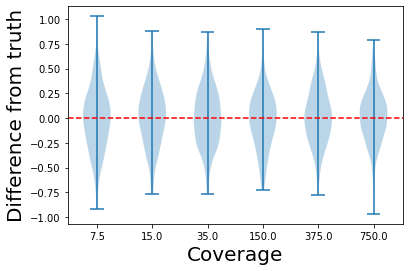

In [ ]:
#Plot posterior correlation violin plots.
plt.violinplot(xx_cor)
plt.xticks(lb_cor_tick,lb_cor)
plt.axhline(y=0, color='r',linestyle ='--')
plt.xlabel('Coverage',fontsize=20)
plt.ylabel('Difference from truth',fontsize=20)
plt.savefig(Folder+'SCRaPL/Synth/Figures/Coverage/Beta/Coverge_Beta_exp_cor.pdf', bbox_inches='tight')
plt.show()

In [ ]:
#Aggregate posterior methylation mean samples from different experiments.
lb_m_met_tick=[]
lb_m_met = []
xx_m_met = []
for ii in range(len(a2)):
      with open(Folder+'SCRaPL/Synth/Data/Coverage/Beta/mm_met_'+str(a1[ii])+'_'+str(a2[ii])+'.pickle', 'rb') as handle:
                  xx= pickle.load(handle)   
      with open(Folder+'SCRaPL/Synth/Results/Coverage/Beta/nuts_m_met_'+str(a1[ii])+'_'+str(a2[ii])+'.pickle', 'rb') as handle:
                  nuts_xx = pickle.load(handle)
      
      tt = tf.reduce_mean(nuts_xx-tf.transpose(xx),axis=0)
      ss = tfp.stats.quantiles(tt,50)
      ss1 = ss[2]
      ss2 = ss[-3]
      tt1 = tf.where(tf.less_equal(tt, ss[1]), tf.zeros_like(tt), tt)
      tt1 = tf.where(tf.greater_equal(tt1, ss[-2]), tf.zeros_like(tt1), tt1)

      globals()['x'+str(ii)] = tt1
      lbb = np.round_(0.5*(a1[ii]+a2[ii]),decimals=1)
      lb_m_met.append(lbb)
      lb_m_met_tick.append(ii+1)
      xx_m_met.append(globals()['x'+str(ii)])

In [ ]:
#Aggregate posterior expression mean samples from different experiments.
lb_m_exp_tick=[]
lb_m_exp = []
xx_m_exp = []
for ii in range(len(a2)):
      with open(Folder+'SCRaPL/Synth/Data/Coverage/Beta/mm_exp_'+str(a1[ii])+'_'+str(a2[ii])+'.pickle', 'rb') as handle:
                  xx= pickle.load(handle)   
      with open(Folder+'SCRaPL/Synth/Results/Coverage/Beta/nuts_m_exp_'+str(a1[ii])+'_'+str(a2[ii])+'.pickle', 'rb') as handle:
                  nuts_xx = pickle.load(handle)

      tt = tf.reduce_mean(nuts_xx-tf.transpose(xx),axis=0)
      ss = tfp.stats.quantiles(tt,50)
      tt1 = tf.where(tf.less_equal(tt, ss[1]), tf.zeros_like(tt), tt)
      tt1 = tf.where(tf.greater_equal(tt1, ss[-2]), tf.zeros_like(tt1), tt1)

      globals()['x'+str(ii)] = tt1
      lbb = np.round_(0.5*(a1[ii]+a2[ii]),decimals=1)
      lb_m_exp.append(lbb)
      lb_m_exp_tick.append(ii+1)
      xx_m_exp.append(globals()['x'+str(ii)])

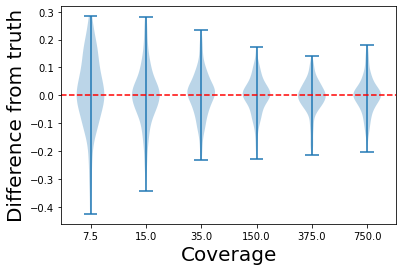

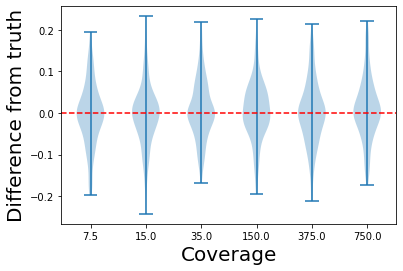

In [ ]:
#Plot posterior methylation and expression mean violin plots.
plt.violinplot(xx_m_met)
plt.xticks(lb_m_met_tick,lb_m_met)
plt.axhline(y=0, color='r',linestyle ='--')
plt.xlabel('Coverage',fontsize=20)
plt.ylabel('Difference from truth',fontsize=20)
plt.savefig(Folder+'SCRaPL/Synth/Figures/Coverage/Beta/Coverage_Beta_exp_lt_met_mn.pdf', bbox_inches='tight')
plt.show()

plt.violinplot(xx_m_exp)
plt.xticks(lb_m_exp_tick,lb_m_exp)
plt.axhline(y=0, color='r',linestyle ='--')
plt.xlabel('Coverage',fontsize=20)
plt.ylabel('Difference from truth',fontsize=20)
plt.savefig(Folder+'SCRaPL/Synth/Figures/Coverage/Beta/Coverage_Beta_exp_lt_exp_mn.pdf', bbox_inches='tight')
plt.show()

In [ ]:
#Aggregate posterior methylation standard deviation samples from different experiments.
lb_s_met_tick=[]
lb_s_met = []
xx_s_met = []
for ii in range(len(a2)):
      with open(Folder+'SCRaPL/Synth/Data/Coverage/Beta/ss_met_'+str(a1[ii])+'_'+str(a2[ii])+'.pickle', 'rb') as handle:
                  xx= pickle.load(handle)   
      with open(Folder+'SCRaPL/Synth/Results/Coverage/Beta/nuts_s_met_'+str(a1[ii])+'_'+str(a2[ii])+'.pickle', 'rb') as handle:
                  nuts_xx = pickle.load(handle)

      tt = tf.reduce_mean(nuts_xx-tf.transpose(xx),axis=0)
      ss = tfp.stats.quantiles(tt,50)
      ss1 = ss[1]
      ss2 = ss[-2]
      tt1 = tf.where(tf.less_equal(tt, ss[1]), tf.zeros_like(tt), tt)
      tt1 = tf.where(tf.greater_equal(tt1, ss[-2]), tf.zeros_like(tt1), tt1)

      globals()['x'+str(ii)] = tt1

      lbb = np.round_(0.5*(a1[ii]+a2[ii]),decimals=1)
      lb_s_met.append(lbb)
      lb_s_met_tick.append(ii+1)
      xx_s_met.append(globals()['x'+str(ii)])

FileNotFoundError: ignored

In [ ]:
#Aggregate posterior expression standard deviation samples from different experiments.
lb_s_exp_tick=[]
lb_s_exp = []
xx_s_exp = []
for ii in range(len(a2)):
      with open(Folder+'SCRaPL/Synth/Data/Coverage/ss_exp_'+str(a1[ii])+'_'+str(a2[ii])+'.pickle', 'rb') as handle:
                  xx= pickle.load(handle)   
      with open(Folder+'SCRaPL/Synth/Results/Coverage/nuts_s_exp_'+str(a1[ii])+'_'+str(a2[ii])+'.pickle', 'rb') as handle:
                  nuts_xx = pickle.load(handle)
      
      tt = tf.reduce_mean(nuts_xx-tf.transpose(xx),axis=0)
      ss = tfp.stats.quantiles(tt,50)
      ss1 = ss[1]
      ss2 = ss[-2]
      tt1 = tf.where(tf.less_equal(tt, ss[2]), tf.zeros_like(tt), tt)
      tt1 = tf.where(tf.greater_equal(tt1, ss[-2]), tf.zeros_like(tt1), tt1)

      globals()['x'+str(ii)] = tt1
      lbb = np.round_(0.5*(a1[ii]+a2[ii]),decimals=1)
      lb_s_exp.append(lbb)
      lb_s_exp_tick.append(ii+1)
      xx_s_exp.append(globals()['x'+str(ii)])

In [ ]:
#Plot posterior methylation and expression standard deviation violin plots.
plt.violinplot(xx_s_met)
plt.xticks(lb_s_met_tick,lb_s_met)
plt.axhline(y=0, color='r',linestyle ='--')
plt.xlabel('Coverage',fontsize=20)
plt.ylabel('Difference from truth',fontsize=20)
plt.savefig(Folder+'SCRaPL/SynthFigures/Coverage/Beta/Coverage_Beta_exp_lt_met_sig.pdf', bbox_inches='tight')
plt.show()

plt.violinplot(xx_s_exp)
plt.xticks(lb_s_exp_tick,lb_s_exp)
plt.axhline(y=0, color='r',linestyle ='--')
plt.xlabel('Coverage',fontsize=20)
plt.ylabel('Difference from truth',fontsize=20)
plt.savefig(Folder+'SCRaPL/Synth/Figures/Coverage/Beta/Coverage_Beta_exp_lt_exp_sig.pdf', bbox_inches='tight')
plt.show()